# Contents
## Importing libraries and data
## Data cleaning
### &emsp; Basic cleaning
### &emsp; Fixing the 'timestamp' column
### &emsp; Grouping the dates so that we get a line chart that makes sense
## Creating a line chart
## Decomposing the data's components
## Testing for Stationarity (Dickey-Fuller test)
## Stationarizing the data by differencing
## Checking the data's autocorrelations
## Exporting data

___

# Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

from datetime import datetime
from pylab import rcParams # This will define a fixed size for all special charts.
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

warnings.filterwarnings("ignore") # Disable deprecation warnings

plt.style.use('fivethirtyeight') 

In [2]:
# Display graphs within the notebook without the need to "call" them specifically

%matplotlib inline

In [3]:
# Turning project folder into string

path = r'C:\Users\davau\OneDrive - College of the Sequoias\Career Foundry\Data Immersion\Achievement 6 (Python and Tableau)\Job Market for Data Analytics'

In [4]:
# Importing stem_salaries_sub.csv

df_sub = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'stem_salaries_sub.csv'), index_col = False)

In [5]:
df_sub.head()

,Unnamed: 0.1,Unnamed: 0,timestamp,company,level,title,totalyearlycompensation,location,city,state,...,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,race,education
0,0,0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",Redwood City,CA,...,1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,NaN,NaN
1,1,1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",San Francisco,CA,...,5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2,2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",Seattle,WA,...,8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,NaN,NaN
3,3,3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",Sunnyvale,CA,...,7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,NaN,NaN
4,4,4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",Mountain View,CA,...,5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

### Basic cleaning

In [6]:
# Dropping useless columns

df_sub = df_sub.drop(columns = ['Unnamed: 0.1','Unnamed: 0'])

In [7]:
df_sub.head()

,timestamp,company,level,title,totalyearlycompensation,location,city,state,country,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,race,education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",Redwood City,CA,United States of America,1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",San Francisco,CA,United States of America,5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",Seattle,WA,United States of America,8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",Sunnyvale,CA,United States of America,7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",Mountain View,CA,United States of America,5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
df_sub.shape

(62488, 19)

In [9]:
# Dropping individuals who claim 50 years of experience or more

df_sub = df_sub[df_sub['yearsofexperience'] < 50] 
df_sub.shape

(62487, 19)

### Fixing the 'timestamp' column

In [10]:
# Creating new columns that split the timestamp by date and time

date_time = df_sub['timestamp'].str.split(pat = ' ', n=1, expand = True)
date_time.head()

,0,1
0,6/7/2017,11:33:27
1,6/10/2017,17:11:29
2,6/11/2017,14:53:57
3,6/17/2017,0:23:14
4,6/20/2017,10:58:51


In [11]:
# Inserting the columns into the df

df_sub.insert(loc = 0, column = 'date', value = date_time[0])
df_sub.insert(loc = 1, column = 'time', value = date_time[1])
df_sub.head()

,date,time,timestamp,company,level,title,totalyearlycompensation,location,city,state,...,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,race,education
0,6/7/2017,11:33:27,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",Redwood City,CA,...,1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,NaN,NaN
1,6/10/2017,17:11:29,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",San Francisco,CA,...,5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,6/11/2017,14:53:57,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",Seattle,WA,...,8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,NaN,NaN
3,6/17/2017,0:23:14,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",Sunnyvale,CA,...,7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,NaN,NaN
4,6/20/2017,10:58:51,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",Mountain View,CA,...,5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [12]:
# Dropping the 'time' and 'timestamp' columns

df_sub = df_sub.drop(columns = ['time','timestamp'])
df_sub.head()

,date,company,level,title,totalyearlycompensation,location,city,state,country,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,race,education
0,6/7/2017,Oracle,L3,Product Manager,127000,"Redwood City, CA",Redwood City,CA,United States of America,1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,NaN,NaN
1,6/10/2017,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",San Francisco,CA,United States of America,5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,6/11/2017,Amazon,L7,Product Manager,310000,"Seattle, WA",Seattle,WA,United States of America,8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,NaN,NaN
3,6/17/2017,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",Sunnyvale,CA,United States of America,7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,NaN,NaN
4,6/20/2017,Microsoft,60,Software Engineer,157000,"Mountain View, CA",Mountain View,CA,United States of America,5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [13]:
# Set the "timestamp" column as the index

df_sub['datetime'] = pd.to_datetime(df_sub['date']) # Create a datetime column from 'date'
df_sub = df_sub.set_index('datetime') # Set the datetime as the index of the dataframe
df_sub.drop(['date'], axis=1, inplace=True) # Drop the 'date' column
df_sub.head()

,company,level,title,totalyearlycompensation,location,city,state,country,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,race,education
datetime,,,,,,,,,,,,,,,,,,
2017-06-07,Oracle,L3,Product Manager,127000,"Redwood City, CA",Redwood City,CA,United States of America,1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,NaN,NaN
2017-06-10,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",San Francisco,CA,United States of America,5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2017-06-11,Amazon,L7,Product Manager,310000,"Seattle, WA",Seattle,WA,United States of America,8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,NaN,NaN
2017-06-17,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",Sunnyvale,CA,United States of America,7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,NaN,NaN
2017-06-20,Microsoft,60,Software Engineer,157000,"Mountain View, CA",Mountain View,CA,United States of America,5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [14]:
# Subsetting to 'datetime' and 'totalyearlycompensation' only

df_time = df_sub[['totalyearlycompensation']]
df_time.head()

,totalyearlycompensation
datetime,
2017-06-07,127000
2017-06-10,100000
2017-06-11,310000
2017-06-17,372000
2017-06-20,157000


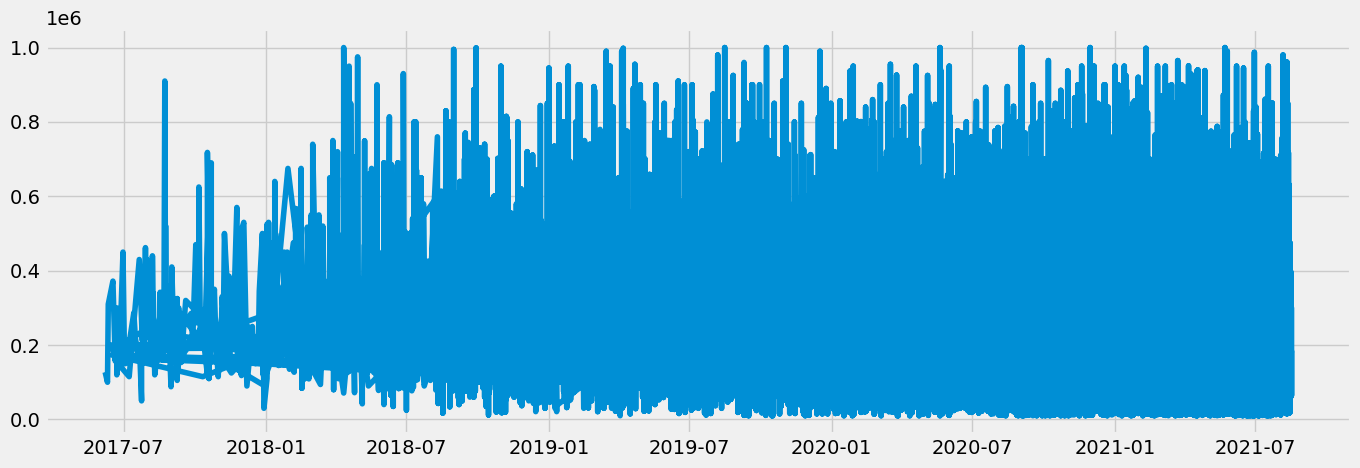

In [15]:
# Plot the data

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(df_time)

Ugly.  What's happening is that there are multiple individuals with very different salaries answering the survey on the same day.  I feel like the best way to deal with this would be to take the average (median) salary of all individuals who answer the survey on a given day, and then plot those, as what I'm really trying to do is understand how average salary changes with time.

### Grouping the dates so that we get a line chart that makes sense

In [16]:
# Grouping by 'datetime' and reporting the median

df_time_grouped = df_time.groupby('datetime')['totalyearlycompensation'].median()
df_time_grouped.head()

datetime
2017-06-07    127000.0
2017-06-10    100000.0
2017-06-11    310000.0
2017-06-14    200000.0
2017-06-16    173000.0
Name: totalyearlycompensation, dtype: float64

In [17]:
df_time_grouped.shape

(1423,)

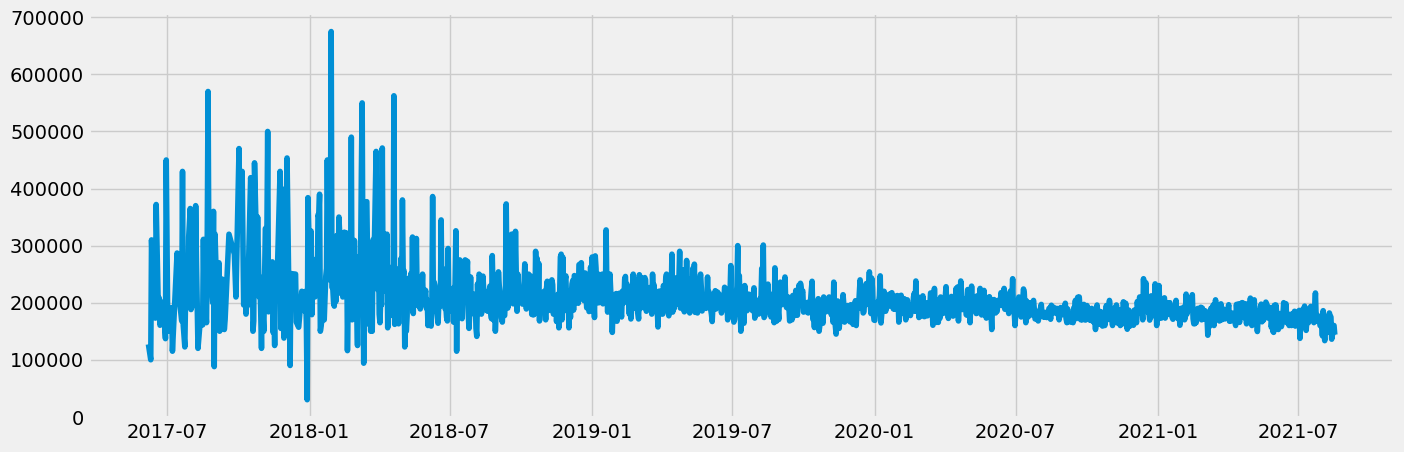

In [18]:
# Plot the data

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(df_time_grouped)

Better, but still lots of variation.  I do notice something interesting, though: the amount of variation decreases with time.  I wonder if the website established better vetting procedures for people answering the survey.  At any rate, I think I may actually group even further (by month).  To do that, I will simply remove the last two digits from 'datetime'.

In [19]:
df_time_grouped = df_time_grouped.reset_index()

In [20]:
df_time_grouped.dtypes

datetime                   datetime64[ns]
totalyearlycompensation           float64
dtype: object

In [21]:
df_time_grouped['datetime'] = df_time_grouped['datetime'].astype(str)

In [22]:
df_time_grouped['datetime'] = df_time_grouped['datetime'].str[:-3]

In [23]:
df_time_grouped.head()

,datetime,totalyearlycompensation
0,2017-06,127000.0
1,2017-06,100000.0
2,2017-06,310000.0
3,2017-06,200000.0
4,2017-06,173000.0


In [24]:
# Set the "datetime" column as the index

df_time_grouped['date'] = pd.to_datetime(df_time_grouped['datetime']) # Create a date column from 'datetime'
df_time_grouped = df_time_grouped.set_index('date') # Set the date as the index of the dataframe
df_time_grouped.drop(['datetime'], axis=1, inplace=True) # Drop the 'datetime' column
df_time_grouped.head()

,totalyearlycompensation
date,
2017-06-01,127000.0
2017-06-01,100000.0
2017-06-01,310000.0
2017-06-01,200000.0
2017-06-01,173000.0


In [25]:
# Grouping by 'date' and reporting the median

df_time_grouped = df_time_grouped.groupby('date')['totalyearlycompensation'].median()
df_time_grouped.head()

date
2017-06-01    186750.0
2017-07-01    201500.0
2017-08-01    200000.0
2017-09-01    215000.0
2017-10-01    250000.0
Name: totalyearlycompensation, dtype: float64

In [26]:
df_time_grouped.shape

(51,)

Success!  Now let's get to work...

# Create a line chart

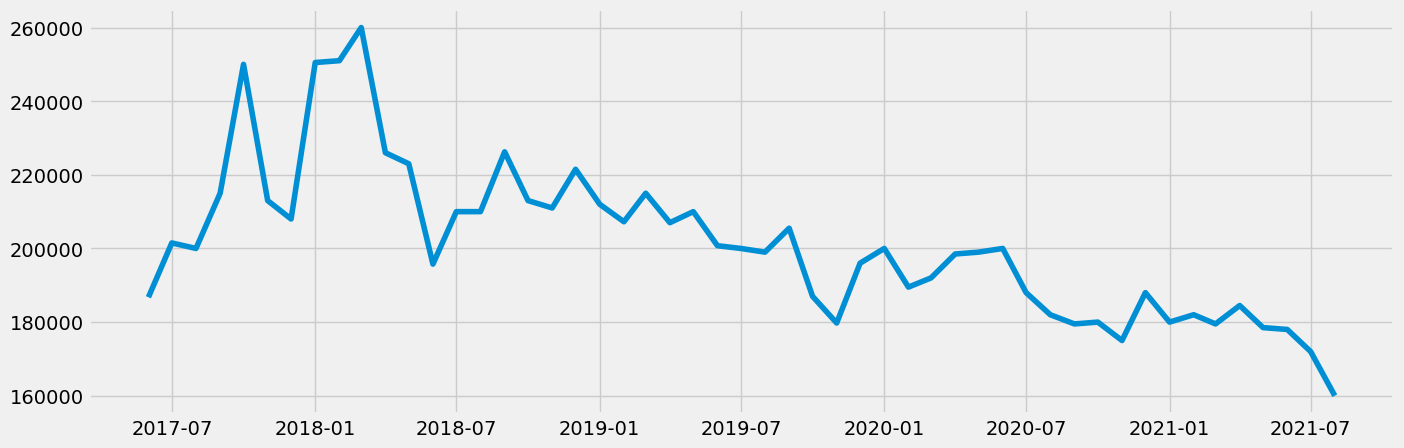

In [27]:
# Plot the data

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(df_time_grouped)

# Decompose the data's components

In [28]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_time_grouped, model='additive')

In [29]:
rcParams['figure.figsize'] = 18, 7

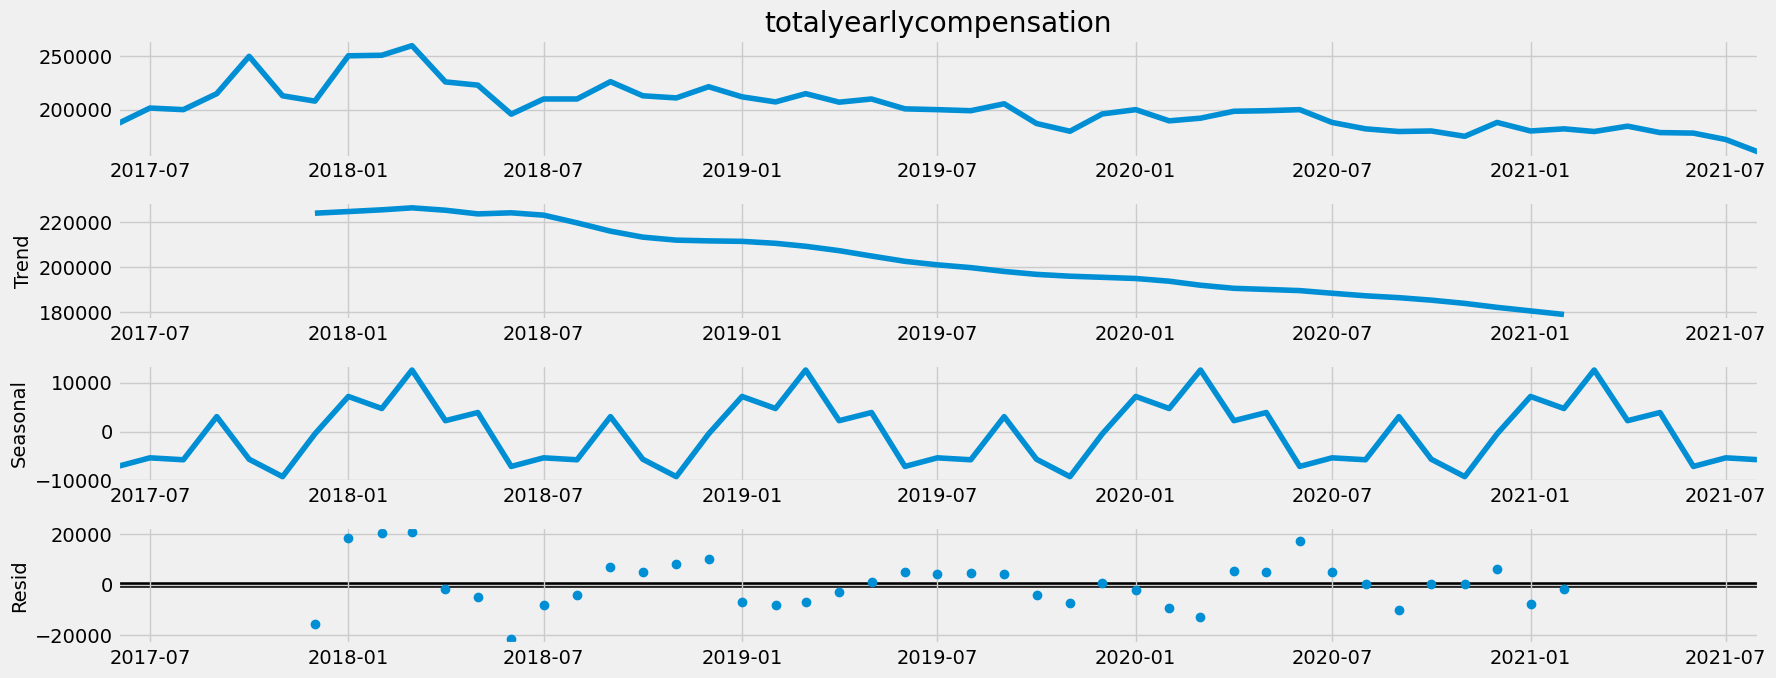

In [30]:
# Plot the separate components

decomposition.plot()
plt.show()

There are a couple surprising things to me here.  One, the overall trend is that salaries have decreased over the last few years.  I'm not sure what to make of this, other than that it could be the result of the wild variance in salaries reported when the survey was first being collected.  

Two, there is very strong seasonality in salary.  I did not expect that, as individuals' salaries do not fluctuate with time, but tend rather to increase steadily.  I suppose that this seasonality could be due to freelancers not having as much work during certain times of the year.  It could also simply be the case that companies offer higher starting salaries at different times of the year, as different employees become in high demand.

# Testing for Stationarity (Dickey-Fuller test)

In [31]:
df_time_grouped.head()

date
2017-06-01    186750.0
2017-07-01    201500.0
2017-08-01    200000.0
2017-09-01    215000.0
2017-10-01    250000.0
Name: totalyearlycompensation, dtype: float64

In [32]:
df_time_grouped = df_time_grouped.reset_index()
df_time_grouped.head()

,date,totalyearlycompensation
0,2017-06-01,186750.0
1,2017-07-01,201500.0
2,2017-08-01,200000.0
3,2017-09-01,215000.0
4,2017-10-01,250000.0


In [33]:
# Set the "datetime" column as the index

df_time_grouped['datetime'] = pd.to_datetime(df_time_grouped['date']) # Create a datetime column from 'date'
df_time_grouped = df_time_grouped.set_index('datetime') # Set the datetime as the index of the dataframe
df_time_grouped.drop(['date'], axis=1, inplace=True) # Drop the 'date' column
df_time_grouped.head()

,totalyearlycompensation
datetime,
2017-06-01,186750.0
2017-07-01,201500.0
2017-08-01,200000.0
2017-09-01,215000.0
2017-10-01,250000.0


In [34]:
def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_time_grouped['totalyearlycompensation'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.784569
p-value                         0.823613
Number of Lags Used            11.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


The p-value is greater than 0.05, so we do not reject the null hypothesis (that there is a unit root, i.e. the data is not stationary). Therefore, we must do some smoothing. 

# Stationarizing the data by differencing

In [35]:
data_diff = df_time_grouped - df_time_grouped.shift(1) 

In [36]:
data_diff.dropna(inplace = True) 

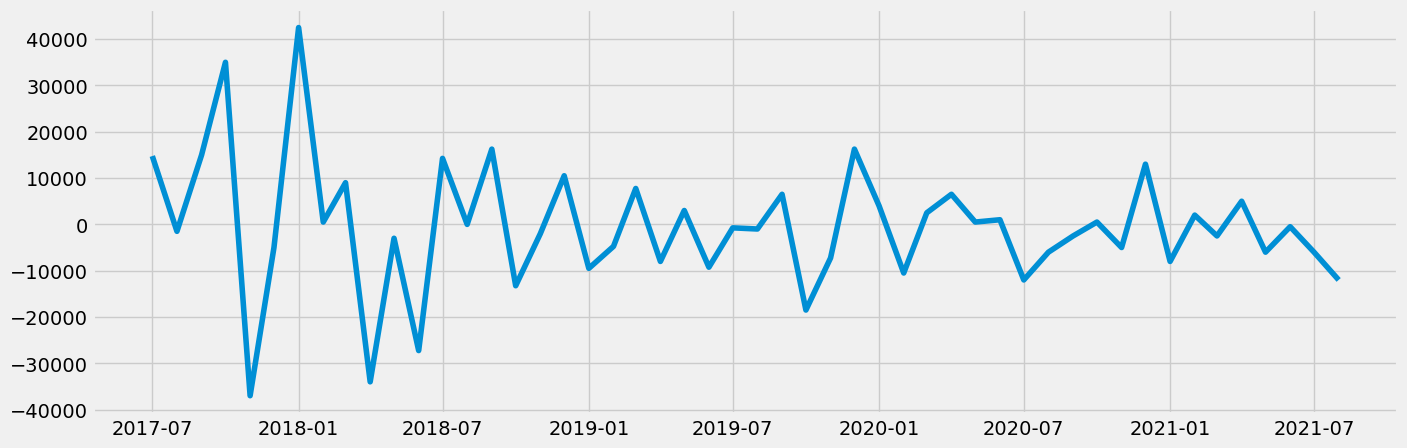

In [37]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [38]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.386744
p-value                         0.000004
Number of Lags Used             2.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


The p-value is less than 0.05, so we reject the null hypothesis in favor of the alternative (that there is no unit root), and we conclude that the data is stationary.

# Checking the data's autocorrelations

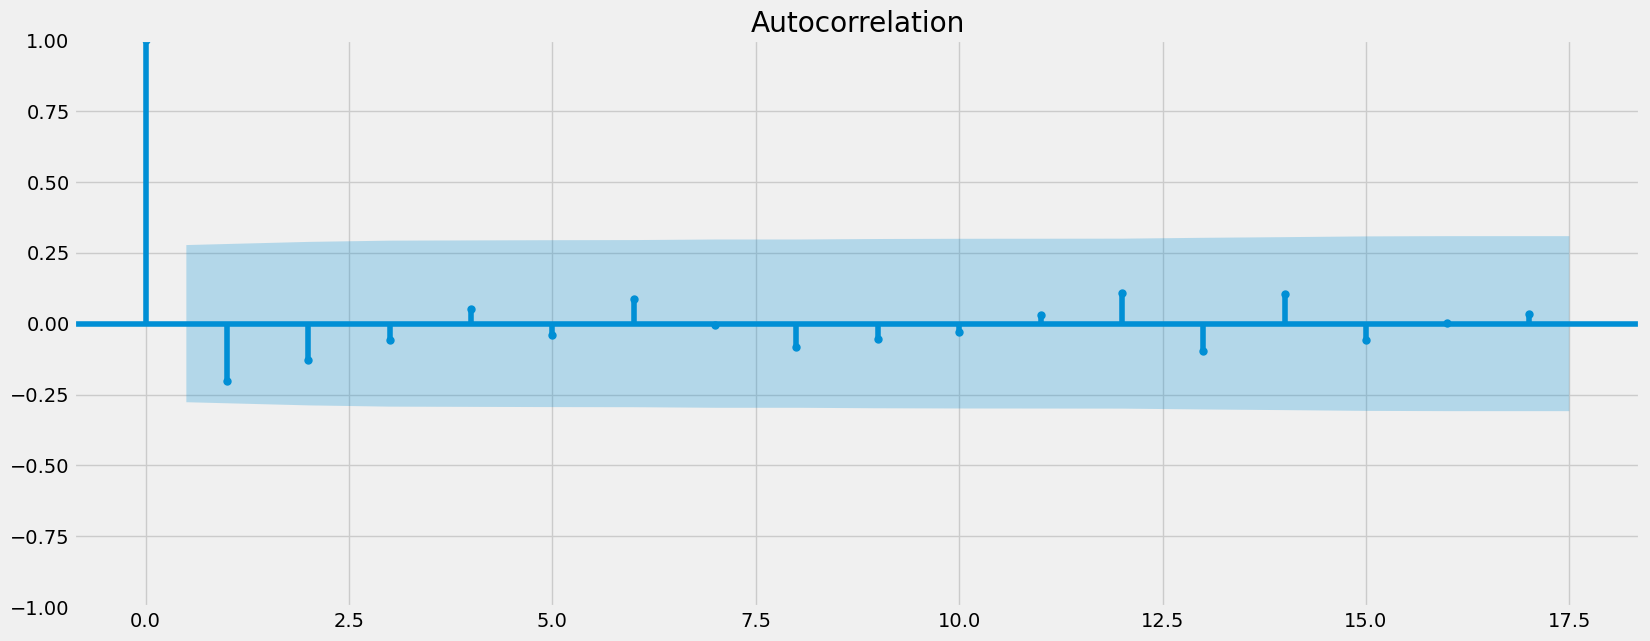

In [39]:
plot_acf(data_diff)
plt.show()

There is not much autocorrelation here (only one lag outside the blue).

# Exporting data

In [40]:
# Exporting df_sub as stem_salaries_squeaky_clean.csv

df_sub.to_csv(os.path.join(path,'02 Data','Prepared Data','stem_salaries_squeaky_clean.csv'))